Unsupervised Learning – Association rules

Applying Association rules on 2000 supermarket baskets

Jorge Bueno Pérez - 419034

The goal of this paper is to learn how to apply apriori association rules algorithm with R.

In this paper we will analyze a random dataset generated with the help of the website: https://www.dunnhumby.com/. It contains 2000 different supermarket baskets/transactions in two different periods of time, with other additional information. For the purposes of this paper, the columns PROD_CODE (character, with the format: PRD0+6numbers) and BASKET_ID (number with 15 digits) will be selected.

Association rules can be applied in many ways, one of the most popular one appears in a shopping baskets data set, as it can bring valuable information to the shops, and it can answer many questions like: How the catalog of products should be designed? Where each product should be located in the shop? Which products should receive a promotion? Additionally, we can predict customer behavior.

This paper has been divided in the next parts:

0) Activation of the necessary libraries:
1) Manipulation of the data:
2) Generating rules
3) Conclusions
4) Data set bibliography

0) Activation of the necessary libraries:

In [47]:
library(arules)
library(plyr)
library(RColorBrewer)
library(arulesViz)
library(Matrix)
library(plot3D)
library(rgl)
library(OceanView)
library(rgl)
library(plot3Drgl)
library(reshape2)
library(treemap)
library(reshape2)

1) Manipulation of the data:

In association rules the manipulation of the data is really important, we should have discrete data.

In this case we have continuous data, hence the first step will be to transform the data from continuous to discrete.

First of all we should import the two csv files, each one represents the basket of one week:

In [2]:
transactions_200626 <- read.csv(
    "~/Desktop/Project AR/dunnhumby_Let's-Get-Sort-of-Real-(Sample-2K-baskets)/transactions_200626.csv")
transactions_200627 <- read.csv(
    "~/Desktop/Project AR/dunnhumby_Let's-Get-Sort-of-Real-(Sample-2K-baskets)/transactions_200627.csv")
transactions <- rbind(transactions_200626, transactions_200627)
options(digits = 14) #In order to see the full BASKET_ID number in head()

In [3]:
head(transactions)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,⋯,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,200626,20060823,4,15,1,0.30,PRD0900032,CL00163,DEP00055,G00016,⋯,MM,YF,994102000458380,L,MM,Top Up,Mixed,STORE00001,LS,E02
2,200626,20060821,2,13,1,0.31,PRD0900302,CL00037,DEP00010,G00004,⋯,MM,PE,994102000719678,L,MM,Top Up,Fresh,STORE00001,LS,E02
3,200626,20060821,2,13,3,3.45,PRD0900331,CL00163,DEP00055,G00016,⋯,MM,PE,994102000719678,L,MM,Top Up,Fresh,STORE00001,LS,E02
4,200626,20060823,4,15,1,0.28,PRD0900684,CL00043,DEP00011,G00004,⋯,MM,YF,994102000458380,L,MM,Top Up,Mixed,STORE00001,LS,E02
5,200626,20060823,4,15,1,0.97,PRD0900830,CL00043,DEP00011,G00004,⋯,MM,YF,994102000458380,L,MM,Top Up,Mixed,STORE00001,LS,E02
6,200626,20060823,4,15,1,1.56,PRD0900927,CL00069,DEP00020,G00007,⋯,MM,YF,994102000458380,L,MM,Top Up,Mixed,STORE00001,LS,E02


In [4]:
dim(transactions)

[1] 12905    22

As we can see above, we have a dataset with 22 columns and 12905 rows.

In [5]:
options(digits = 8) #We select 8 digits, because if not we would have 9.941e+14 in BASKET_ID, 
#but as it is a Nominal variable, it would not matter
summary(transactions)

   SHOP_WEEK        SHOP_DATE         SHOP_WEEKDAY      SHOP_HOUR     
 Min.   :200626   Min.   :20060821   Min.   :1.0000   Min.   : 8.000  
 1st Qu.:200626   1st Qu.:20060824   1st Qu.:2.0000   1st Qu.:13.000  
 Median :200627   Median :20060828   Median :4.0000   Median :15.000  
 Mean   :200627   Mean   :20060843   Mean   :3.9808   Mean   :15.154  
 3rd Qu.:200627   3rd Qu.:20060831   3rd Qu.:6.0000   3rd Qu.:18.000  
 Max.   :200627   Max.   :20060903   Max.   :7.0000   Max.   :21.000  
                                                                      
    QUANTITY          SPEND             PROD_CODE      PROD_CODE_10  
 Min.   : 1.000   Min.   : 0.010   PRD0903052:  292   CL00063:  576  
 1st Qu.: 1.000   1st Qu.: 0.730   PRD0903678:  221   CL00031:  371  
 Median : 1.000   Median : 1.210   PRD0904358:  186   CL00070:  319  
 Mean   : 1.481   Mean   : 1.845   PRD0900121:  185   CL00079:  276  
 3rd Qu.: 1.000   3rd Qu.: 2.040   PRD0901265:   97   CL00067:  265  
 Max.   :34.

As it was mentioned before, for the purpose of this paper we will use just two columns, the first one, THE BASKET_ID that is a character with the format: PRD0+6numbers, it represents a unique value for each transaction, in the data set there were many possible variables to choose, but we are interested to have the baskets. The second feature, the PROD_CODE as a numeric value with 15 digits, represents a unique id for each product.
The data set transactions1, was created with these two variables

In [6]:
options(digits = 14)
transactions1 <- cbind(transactions["BASKET_ID"], transactions["PROD_CODE"])
head(transactions1)

,BASKET_ID,PROD_CODE
,<dbl>,<fct>
1,994102000458380,PRD0900032
2,994102000719678,PRD0900302
3,994102000719678,PRD0900331
4,994102000458380,PRD0900684
5,994102000458380,PRD0900830
6,994102000458380,PRD0900927


In [7]:
dim(transactions1)

[1] 12905     2

The dataset transaction1 was created, it has 2 columns (features), and 12905 rows. It means that we have 12904 baskets associated with each product, the transaction can be repeated, the rule is that we cannot have the same transaction with the same product.

The above result with use of the function dim() is not enough to answer questions like: How many baskets/transaction are in the data set? How many products are in the data set?
But we can reply to this question with the functions length() and unique:

In [8]:
cat("In the data set transactions1 there are:", length(unique(transactions$BASKET_ID)),
    "unique baskets/transactions")
cat("\nIn the data set transactions1 there are:", length(unique(transactions$PROD_CODE)),
    "unique products")

In the data set transactions1 there are: 2000 unique baskets/transactions
In the data set transactions1 there are: 3101 unique products

At this point, it would be interesting to create a treemap in order to see the most bought products along all the baskets:

In [9]:
s <- data.frame(count(transactions1$PROD_CODE))
dim(s) #3101 products

[1] 3101    2

As we can see above there are too many products (3100), and it would be difficult to analyze something in the treemap, hence it would be better to create the rule that only the products with the frequency more than 20 will be represented, as we can see below:

In [10]:
r <- s[!rowSums(s[-1] < 20),]
dim(r) #64 products

[1] 64  2

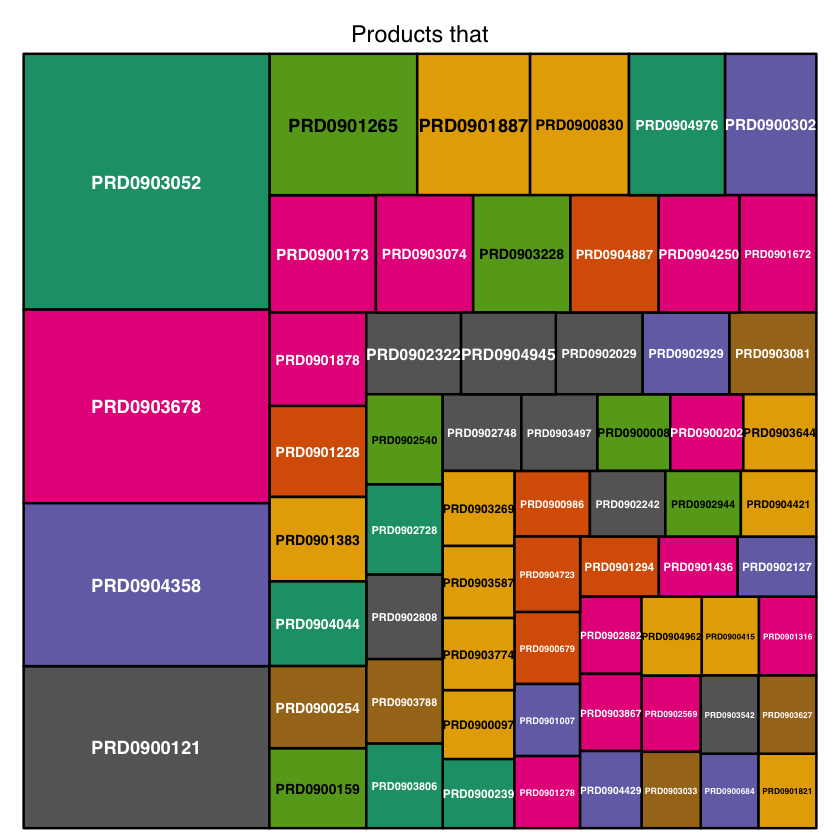

In [11]:
treemap(r,
        vSize = "freq",  
        index ="x",
        palette = "Dark2",  
        title="Products that", 
        fontsize.title = 14 
        )

The sum of the frequency should be the same as the length of the transactions1 data set

In [12]:
sum(s$freq) 

[1] 12905

transactions1 was a continuous data, now we will begin to transform to discrete, with the help of the function ddply():

In [13]:
transactions2 <- ddply(transactions1,
                       c("BASKET_ID"),
                    function(df1)paste(df1$PROD_CODE, 
                                       collapse = ","))
colnames(transactions2) <- c("Basket number", "Product codes")
head(transactions2)

,Basket number,Product codes
,<dbl>,<chr>
1,994102000001422,"PRD0900154,PRD0901819,PRD0904263"
2,994102000002105,"PRD0900833,PRD0901648,PRD0904773"
3,994102000003300,"PRD0901131,PRD0901265,PRD0901359,PRD0901705,PRD0902051,PRD0902648"
4,994102000003606,"PRD0902008,PRD0903033,PRD0904315,PRD0904746,PRD0904896"
5,994102000003857,"PRD0900907,PRD0901329"
6,994102000004284,"PRD0902495,PRD0902640,PRD0903052,PRD0903081,PRD0904358,PRD0904478,PRD0904481"


We have a new data set with discrete data, transactions2. Now we can proceed to save the data as csv file. To do this we will use write.table instead of write.csv method, as the second method does not allow to use col.names equal to false, in order not to have the column names in the csv file

In [14]:
write.table(transactions2,
            "~/Desktop/Project AR/transactions.csv", 
            quote = FALSE, 
            row.names = FALSE, 
            col.names = FALSE)

Once the file is created, we can proceed to read it as transactions, creating a new discrete data set: basket, which will be used along the application of the apriori association rules algorithm

In [15]:
basket <- read.transactions("~/Desktop/Project AR/transactions.csv",
                            format = 'basket', 
                            sep=',')
summary(basket)

transactions as itemMatrix in sparse format with
 2000 rows (elements/itemsets/transactions) and
 4875 columns (items) and a density of 0.0013235897435897 

most frequent items:
PRD0903052 PRD0903678 PRD0904358 PRD0901265 PRD0901887    (Other) 
       268        201        165         85         65      12121 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
354 317 253 161 125  99  94  72  65  53  57  45  35  38  27  32  26  22  25  11 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  41  46  51 
  8   9   9  12  10   8   8   3   6   4   4   1   2   1   1   1   1   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 1.0000  2.0000  4.0000  6.4525  9.0000 51.0000 

includes extended item information - examples:
                      labels
1 994102000001422 PRD0900154
2 994102000002105 PRD0900833
3 994102000003300 PRD0901131

There are 2000 transactions and 4875 products, the density tells us the total number of products that are purchased divided by a possible number of products in that matrix, in our case it has the value: 0.0013235897435897

While checking the summary of our transactions, we can find a valuable information:

Firstly, we are able to calculate how many products were purchased:

In [50]:
cat("The total number of products purchased is:", floor(2000 * 4875 * 0.0013235897435897), 
    "\nAnd it should be equal +1 to the length of rows of the original data set:",
dim(transactions)) 

The total number of products purchased is: 12904 
And it should be equal +1 to the length of rows of the original data set: 12905 22

Consequently, we will be able to check if me made any mistake in the process of transforming our data from continuous to discrete

Note that it should be equal to plus one, as in the original data frame (transactions) we are counting also the column names, but the csv file has not the column names as it was declared: col.names = FALSE, in the write.table function

Also we can find the most commonly bought products:

1) PRD0903052 - 268 units 
2) PRD0903678 - 201 units
3) PRD0904358 - 165 units

Finally, we can see that the average of transaction is 6.4525, and the maximum number of products in one transaction is equal to 51

Now we can create a bar chart graph plot in order to represent the different frequencies of the products. In this case we display the top 20 most frequently bought products, as a relative measure (it can be also absolute).

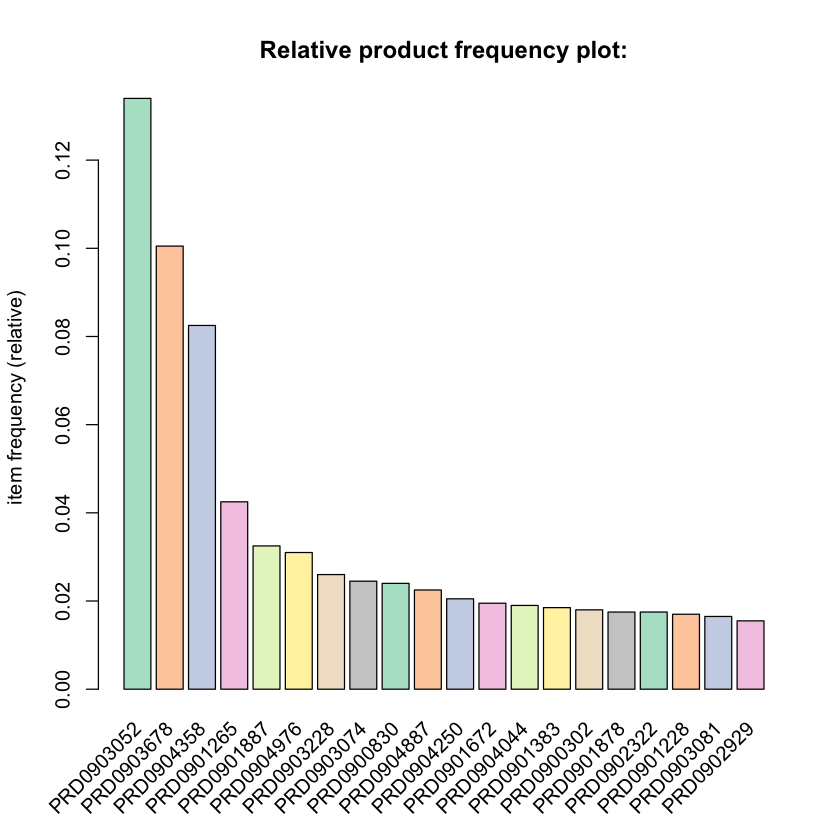

In [17]:
itemFrequencyPlot(basket, 
                  topN = 20,
                  type = "relative", 
                  col = brewer.pal(8,'Pastel2'),
                  main = "Relative product frequency plot:")

When we used summary() we found the same information as above, the product: PRD0903052 is the most frequently bought along the data, we can see that it appears with frequency more than 12%

The previous graph was created without fixing the support, but it is possible to fix the support. The support is the frequency of the pattern in the rule, it has been set up as 0.03, this means that the product should occur at least 3 times in 100 transactions, as we can find below there are only 6 items that meet this condition:

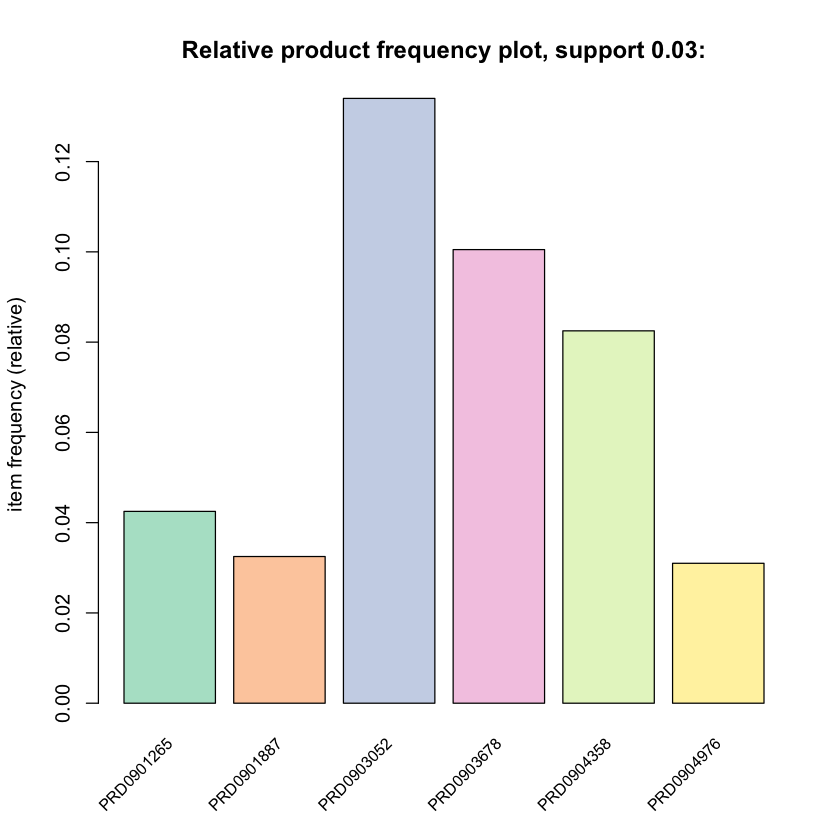

In [18]:
itemFrequencyPlot(basket, 
                  support=0.03, 
                  cex.names=0.8,
                  type = "relative",
                  col = brewer.pal(8,'Pastel2'),
                  main = "Relative product frequency plot, support 0.03:")

If we increase the support we will have more items, we can check this with support 0.05:

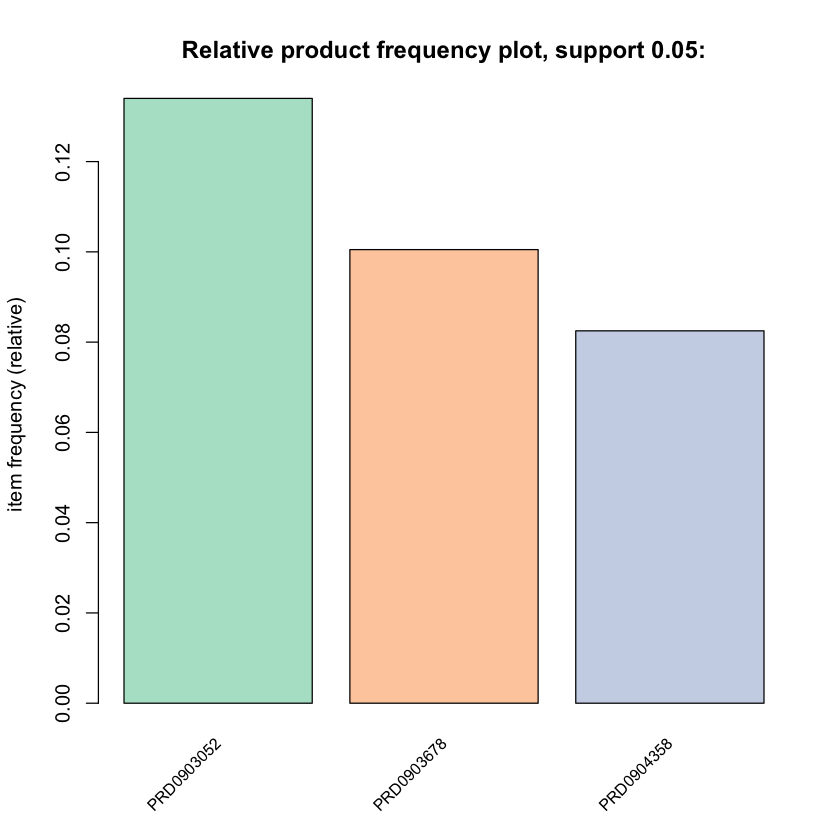

In [19]:
itemFrequencyPlot(basket,
                  support=0.05, 
                  cex.names=0.8,
                  type = "relative",
                  col = brewer.pal(8,'Pastel2'),
                  main = "Relative product frequency plot, support 0.05:")

In this case there are only 3 products that occur at least 5 times in 100 transactions, it sense logical that the support has negative correlation with the number of products - more support means less products

Also we can find the same result as before, but in a table with the help of the algorithm eclat:

In [20]:
freq.items <- eclat(basket, 
                    parameter=list(support=0.03, 
                                   maxlen=15))
inspect(freq.items)

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE    0.03      1     15 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 60 

create itemset ... 
set transactions ...[4875 item(s), 2000 transaction(s)] done [0.01s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating sparse bit matrix ... [6 row(s), 2000 column(s)] done [0.00s].
writing  ... [6 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
    items        support count
[1] {PRD0903052} 0.1340  268  
[2] {PRD0904358} 0.0825  165  
[3] {PRD0903678} 0.1005  201  
[4] {PRD0901265} 0.0425   85  
[5] {PRD0904976} 0.0310   62  
[6] {PRD0901887} 0.0325   65  


Additionally, we can create different kind of cross tables:

In [21]:
ctbasket <- crossTable(basket, 
                       measure="count", 
                       sort=TRUE) #Count
head(ctbasket)

,PRD0903052,PRD0903678,PRD0904358,PRD0901265,PRD0901887,PRD0904976,PRD0903228,PRD0903074,PRD0900830,PRD0904887,⋯,PRD0904927,PRD0904931,PRD0904949,PRD0904953,PRD0904956,PRD0904964,PRD0904966,PRD0904990,PRD0904993,PRD0904997
PRD0903052,268,45,46,32,16,20,13,17,16,14,⋯,0,1,1,0,0,0,1,0,0,0
PRD0903678,45,201,17,13,7,6,3,2,4,5,⋯,0,0,0,0,0,0,0,0,0,1
PRD0904358,46,17,165,14,2,9,9,9,7,3,⋯,0,0,0,0,0,0,0,0,0,0
PRD0901265,32,13,14,85,5,11,2,7,3,4,⋯,0,0,0,0,0,0,0,0,0,0
PRD0901887,16,7,2,5,65,1,6,1,6,3,⋯,0,0,0,0,0,0,0,0,0,0
PRD0904976,20,6,9,11,1,62,1,2,7,4,⋯,0,0,1,0,0,0,0,0,0,0


As we can see in the above cross table the measure count was used, it means that we will have the information about how many times the products occur together.

For example:
1)The product PRD0903052 occurred 268 (as the same product against each product, is the count of each product)
2)The product PRD0903052 and PRD0903678 occurred together in 45 baskets

In [22]:
stbasket <- crossTable(basket, 
                       measure="support", 
                       sort=TRUE) #Support
head(stbasket)

,PRD0903052,PRD0903678,PRD0904358,PRD0901265,PRD0901887,PRD0904976,PRD0903228,PRD0903074,PRD0900830,PRD0904887,⋯,PRD0904927,PRD0904931,PRD0904949,PRD0904953,PRD0904956,PRD0904964,PRD0904966,PRD0904990,PRD0904993,PRD0904997
PRD0903052,0.1340,0.0225,0.0230,0.0160,0.0080,0.0100,0.0065,0.0085,0.0080,0.0070,⋯,0,5e-04,5e-04,0,0,0,5e-04,0,0,0e+00
PRD0903678,0.0225,0.1005,0.0085,0.0065,0.0035,0.0030,0.0015,0.0010,0.0020,0.0025,⋯,0,0e+00,0e+00,0,0,0,0e+00,0,0,5e-04
PRD0904358,0.0230,0.0085,0.0825,0.0070,0.0010,0.0045,0.0045,0.0045,0.0035,0.0015,⋯,0,0e+00,0e+00,0,0,0,0e+00,0,0,0e+00
PRD0901265,0.0160,0.0065,0.0070,0.0425,0.0025,0.0055,0.0010,0.0035,0.0015,0.0020,⋯,0,0e+00,0e+00,0,0,0,0e+00,0,0,0e+00
PRD0901887,0.0080,0.0035,0.0010,0.0025,0.0325,0.0005,0.0030,0.0005,0.0030,0.0015,⋯,0,0e+00,0e+00,0,0,0,0e+00,0,0,0e+00
PRD0904976,0.0100,0.0030,0.0045,0.0055,0.0005,0.0310,0.0005,0.0010,0.0035,0.0020,⋯,0,0e+00,5e-04,0,0,0,0e+00,0,0,0e+00


In this second table the measure support was used, it is similar to the previous result, but in this case it is relative to the total number of baskets (2000). As we could see before, the product PRD0903052 and PRD0903678 occurred together in 45 baskets, hence in this case we will have 45 divided 2000 (second row, first column)

In [23]:
cat("The support of  PRD0903052 and PRD0903678 products is equal to:", 45/2000)

The support of  PRD0903052 and PRD0903678 products is equal to: 0.0225

We can apply a statistic association test, chi-squared.
By way of this test we will be able to check if there is association or not between the products.

p-value: 5%

H0: No association between the two variables (null hypothesis)
H1: Association between the two variables (alternative hypothesis)

If value > 0.05 = Not reject H0, there is no association between the two variables
If value < 0.05 = Reject H0, there is association between the two variables

In [24]:
chibasket <- crossTable(basket, 
                        measure="chiSquared", 
                        sort=TRUE) #Chi squared test, to analyze association

head(round(chibasket,3))

,PRD0903052,PRD0903678,PRD0904358,PRD0901265,PRD0901887,PRD0904976,PRD0903228,PRD0903074,PRD0900830,PRD0904887,⋯,PRD0904927,PRD0904931,PRD0904949,PRD0904953,PRD0904956,PRD0904964,PRD0904966,PRD0904990,PRD0904993,PRD0904997
PRD0903052,NA,0.006,0.013,0.019,0.003,0.008,0.003,0.008,0.007,0.005,⋯,0,0.003,0.003,0,0,0,0.003,0,0,0.000
PRD0903678,0.006,NA,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,⋯,0,0.000,0.000,0,0,0,0.000,0,0,0.004
PRD0904358,0.013,0.000,NA,0.003,0.001,0.001,0.003,0.003,0.001,0.000,⋯,0,0.000,0.000,0,0,0,0.000,0,0,0.000
PRD0901265,0.019,0.001,0.003,NA,0.001,0.013,0.000,0.006,0.000,0.001,⋯,0,0.000,0.000,0,0,0,0.000,0,0,0.000
PRD0901887,0.003,0.000,0.001,0.001,NA,0.000,0.005,0.000,0.006,0.001,⋯,0,0.000,0.000,0,0,0,0.000,0,0,0.000
PRD0904976,0.008,0.000,0.001,0.013,0.000,NA,0.000,0.000,0.010,0.002,⋯,0,0.000,0.015,0,0,0,0.000,0,0,0.000


In [25]:
dim(chibasket)

[1] 4875 4875

As per the above results, it seems that at least in the head always we have a p-value lower than 5%, hence there is association between all the products. However, this applies only for the header, hence it would be convenient to check somehow the rest of the values.

As there are more than 10 million values, it would be better to create a plot, instead of storing the data in a list

In [51]:
cat("In the crosstable 'chibasket' there are:", 
    floor(((4874*4874)/2) - (4874/2)), 
    "unique values")

In the crosstable 'chibasket' there are: 11875501 unique values

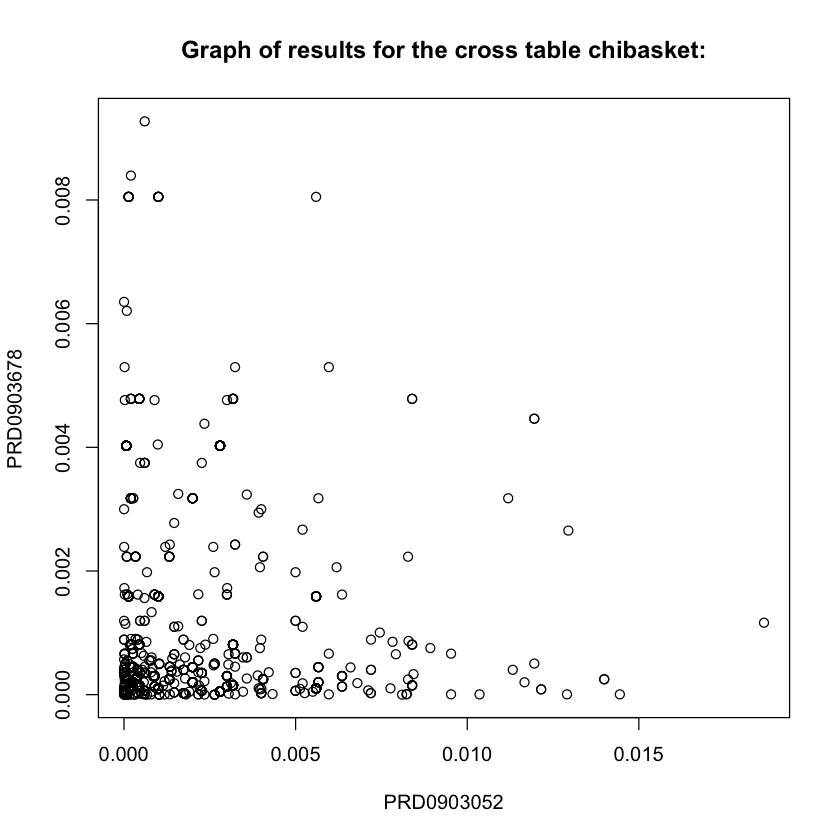

In [27]:
plot(chibasket,
    main = "Graph of results for the cross table chibasket:")

As we can see in the graph above, there is not any p-value greater than 5%, hence we can consider that there is association for all the products

2) Generating rules:

Apriori algorithm:

In [28]:
arbasket <- apriori(basket, 
                    parameter = list(supp = 0.0015, 
                                     conf = 0.4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5  0.0015      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4875 item(s), 2000 transaction(s)] done [0.01s].
sorting and recoding items ... [1221 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [410 rule(s)] done [0.01s].
creating S4 object  ... done [0.00s].


The algorithm will take basket as the transaction object on which mining is to be applied. The parameter were set up as minimum support: 0.0015, and minimum confidence: 0.4

As we can see above there are 410 rules, but some of them are redundant, for this we will proceed to eliminate the redundant rules

In [29]:
subset.rules <- which(colSums(is.subset(arbasket, arbasket)) > 1) 
length(subset.rules)

[1] 132

We obtained 132 redundant rules, hence we should proceed to delete them from our original dataset

In [30]:
arbasket <- arbasket[-subset.rules] 
arbasket

set of 278 rules 

Finally, our dataset arbasket will have 278 rules

In [31]:
options(digits = 4)
summary(arbasket)

set of 278 rules

rule length distribution (lhs + rhs):sizes
  2   3 
263  15 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    2.00    2.05    2.00    3.00 

summary of quality measures:
    support          confidence         lift            count      
 Min.   :0.00150   Min.   :0.400   Min.   :  2.99   Min.   : 3.00  
 1st Qu.:0.00150   1st Qu.:0.444   1st Qu.:  3.73   1st Qu.: 3.00  
 Median :0.00150   Median :0.500   Median :  4.71   Median : 3.00  
 Mean   :0.00198   Mean   :0.564   Mean   : 13.47   Mean   : 3.96  
 3rd Qu.:0.00200   3rd Qu.:0.625   3rd Qu.:  7.93   3rd Qu.: 4.00  
 Max.   :0.00800   Max.   :1.000   Max.   :181.82   Max.   :16.00  

mining info:
   data ntransactions support confidence
 basket          2000  0.0015        0.4

We can check the summary, in order to obtain more information:

-Total number of rules: 278
-Distribution of rules: a length of 2 products have the most rules: 263, and length of 3 products have the lowest number of rules: 15
-We can see also the summary of quality measures
-Finally there is information used for creating the rules

In [32]:
options(digits=5)

In [33]:
inspect(head(sort(arbasket, 
                  by ="lift")
             ,5)) #Lift

    lhs             rhs          support confidence lift   count
[1] {PRD0904263} => {PRD0901819} 0.0015  1.00000    181.82 3    
[2] {PRD0903875} => {PRD0902924} 0.0015  0.75000    136.36 3    
[3] {PRD0903837} => {PRD0903607} 0.0015  0.75000    125.00 3    
[4] {PRD0900266} => {PRD0904489} 0.0015  0.42857    107.14 3    
[5] {PRD0900882} => {PRD0903607} 0.0015  0.60000    100.00 3    


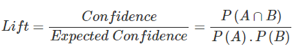

The lift is the result of dividing the confidence, between the expected confidence

As we can see in the results above, we obtained a large lift value. As the value in this top is greater than 1, it means that the occurrence of the first product (for example, PRD0904263) has a positive effect on the occurrence of the product (PRD0901819)

We can check also the lower lift, in order to see if there is any rule lower or equal to 1, as we will have a different interpretation:

In [34]:
inspect(head(sort(arbasket, 
                  by ="lift",
                 decreasing = FALSE) #Lift
             ,5))

    lhs             rhs          support confidence lift   count
[1] {PRD0901067} => {PRD0903052} 0.002   0.4        2.9851 4    
[2] {PRD0901387} => {PRD0903052} 0.002   0.4        2.9851 4    
[3] {PRD0902819} => {PRD0903052} 0.002   0.4        2.9851 4    
[4] {PRD0904613} => {PRD0903052} 0.002   0.4        2.9851 4    
[5] {PRD0904738} => {PRD0903052} 0.002   0.4        2.9851 4    


There is not any lift value for the rules lower or equal to 1, the minimum value obtained is 2.9851, hence the interpretation of the top will be the same for all the products

Anyone who buys PRD0903052 is more than 2.9851 times more likely to buy PRD0901067/PRD0901387/PRD0902819/PRD0904613/PRD0904738 than any other client

The results are as expected, because when it was ran the chi-squared we could not reject the null hypothesis of independent products

In [35]:
arbasket.by.support <- sort(arbasket, 
                            by="support", 
                            decreasing = TRUE) #Support
inspect(arbasket.by.support[1:5])

    lhs             rhs          support confidence lift   count
[1] {PRD0900302} => {PRD0903052} 0.008   0.44444    3.3167 16   
[2] {PRD0902929} => {PRD0903052} 0.007   0.45161    3.3702 14   
[3] {PRD0902728} => {PRD0903052} 0.006   0.40000    2.9851 12   
[4] {PRD0900121} => {PRD0903052} 0.005   0.43478    3.2446 10   
[5] {PRD0900173} => {PRD0903052} 0.005   0.45455    3.3921 10   


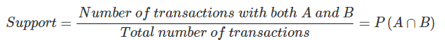

As the previous interpretations, also in this case the product PRD0903052 is present in all the results, we were expecting this, as this product is the most frequently bought. We saw before that this product appears in more than 12% of the 2000 baskets

A lot of rules have small support, but the confidence is greater or equal to 0.40

There are different kind of ways to plot the results:

We can create a scatter plot with the confidence and support (two dimensions), for the rules with confidence more than 0.5, 126 rules

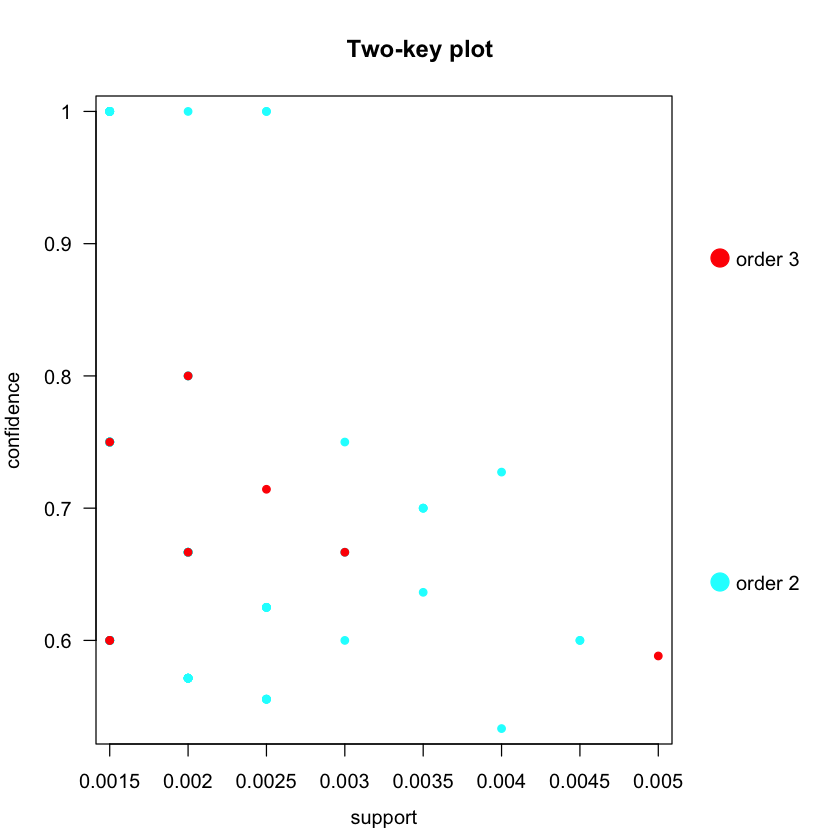

In [36]:
subRules <- arbasket[quality(arbasket)$confidence > 0.5]
#Plot SubRules - support
plot(subRules, 
     measure="support", 
     method="two-key plot", 
     jitter = 0)

We can do the same but in this case with confidence, lift and support (three dimensions with the help of shading), for the rules with confidence more than 0.5, 126 rules

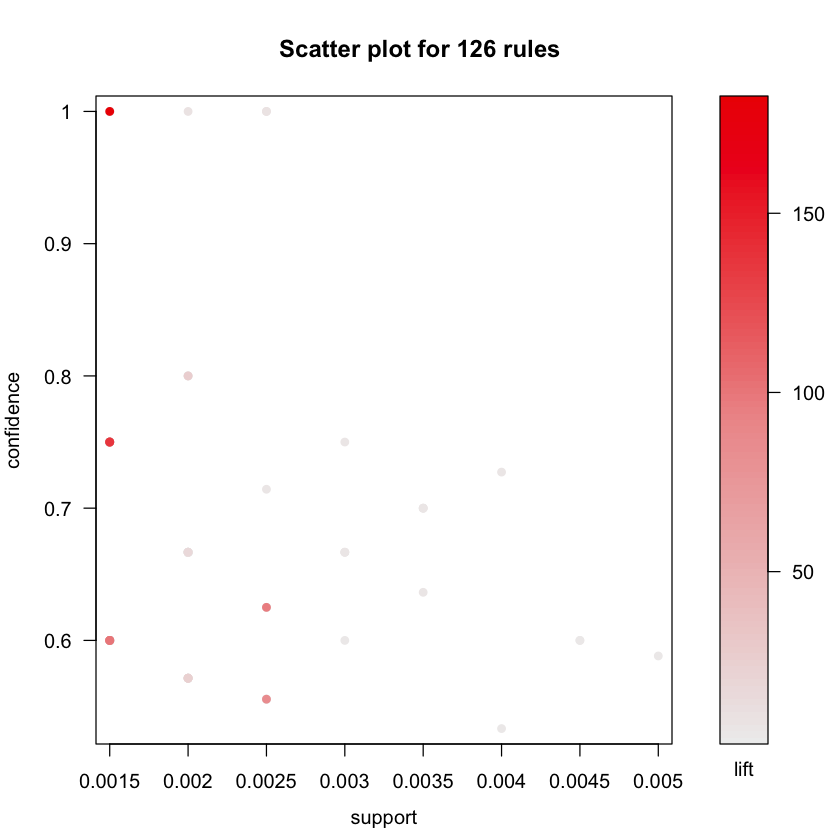

In [37]:
subRules <- arbasket[quality(arbasket)$confidence > 0.5]
#Plot SubRules - lift
plot(subRules, 
     measure = c("support", "confidence"), 
     shading = "lift", 
     jitter = 0)

It appears that when there is a higher lift, there is also a higher confidence

For the next graphs we will use a set of 50 rules (tenarbasket), with the higher confidence:

In [38]:
tenarbasket <- head(arbasket, 
                    n = 50, 
                    by = "confidence")
tenarbasket

set of 50 rules 

We can create a grouped matrix plot, it is similar to the previous representations, but in this case it shows the support of the rules.

Itemsets in Antecedent (LHS)
 [1] "{PRD0904263}"            "{PRD0903837}"           
 [3] "{PRD0902424}"            "{PRD0903875}"           
 [5] "{PRD0902953}"            "{PRD0904299}"           
 [7] "{PRD0903273}"            "{PRD0901891}"           
 [9] "{PRD0903540}"            "{PRD0900736}"           
[11] "{PRD0904620}"            "{PRD0900460}"           
[13] "{PRD0902883}"            "{PRD0900488}"           
[15] "{PRD0900595}"            "{PRD0902105}"           
[17] "{PRD0902374}"            "{PRD0902631}"           
[19] "{PRD0901508}"            "{PRD0901028}"           
[21] "{PRD0901746}"            "{PRD0903745}"           
[23] "{PRD0901343}"            "{PRD0904097}"           
[25] "{PRD0903197}"            "{PRD0902620}"           
[27] "{PRD0901086}"            "{PRD0900867}"           
[29] "{PRD0901244}"            "{PRD0901895}"           
[31] "{PRD0904638}"            "{PRD0904257}"           
[33] "{PRD0901192}"            "{PRD0904250,PRD0904976}"
[3

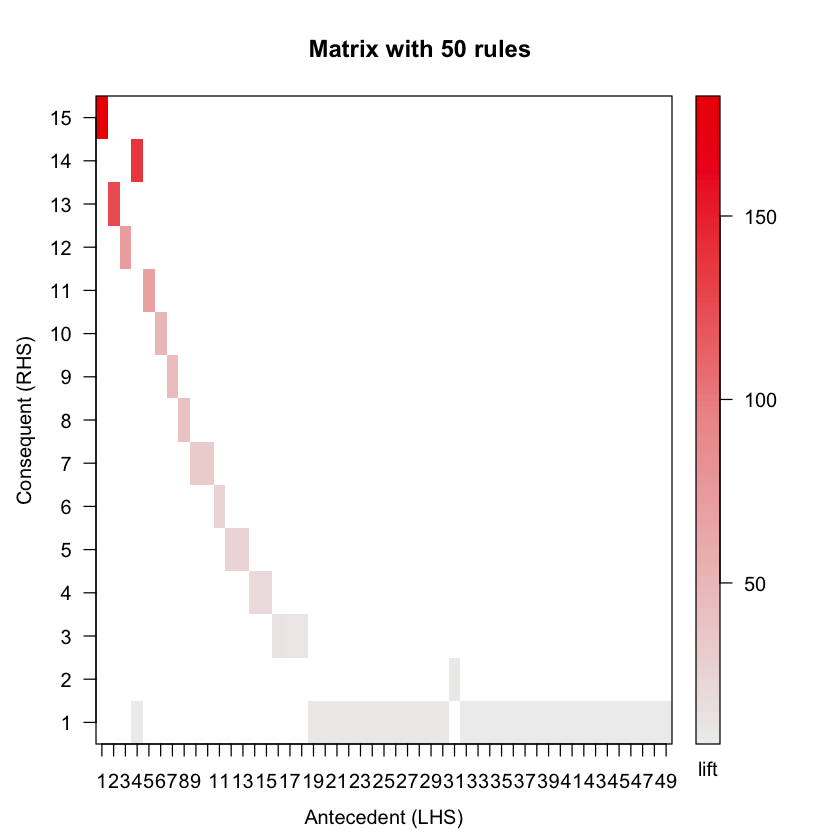

In [39]:
plot(tenarbasket, 
     method = "matrix", 
     measure = "lift")

Apart from that, we can create a matrix with 3 dimensions:

Warning message in plot.rules(tenarbasket, method = "matrix3D", measure = "lift"):
“method 'matrix3D' is deprecated use method 'matrix' with engine '3d'”


Itemsets in Antecedent (LHS)
 [1] "{PRD0904263}"            "{PRD0903837}"           
 [3] "{PRD0902424}"            "{PRD0903875}"           
 [5] "{PRD0902953}"            "{PRD0904299}"           
 [7] "{PRD0903273}"            "{PRD0901891}"           
 [9] "{PRD0903540}"            "{PRD0900736}"           
[11] "{PRD0904620}"            "{PRD0900460}"           
[13] "{PRD0902883}"            "{PRD0900488}"           
[15] "{PRD0900595}"            "{PRD0902105}"           
[17] "{PRD0902374}"            "{PRD0902631}"           
[19] "{PRD0901508}"            "{PRD0901028}"           
[21] "{PRD0901746}"            "{PRD0903745}"           
[23] "{PRD0901343}"            "{PRD0904097}"           
[25] "{PRD0903197}"            "{PRD0902620}"           
[27] "{PRD0901086}"            "{PRD0900867}"           
[29] "{PRD0901244}"            "{PRD0901895}"           
[31] "{PRD0904638}"            "{PRD0904257}"           
[33] "{PRD0901192}"            "{PRD0904250,PRD0904976}"
[3

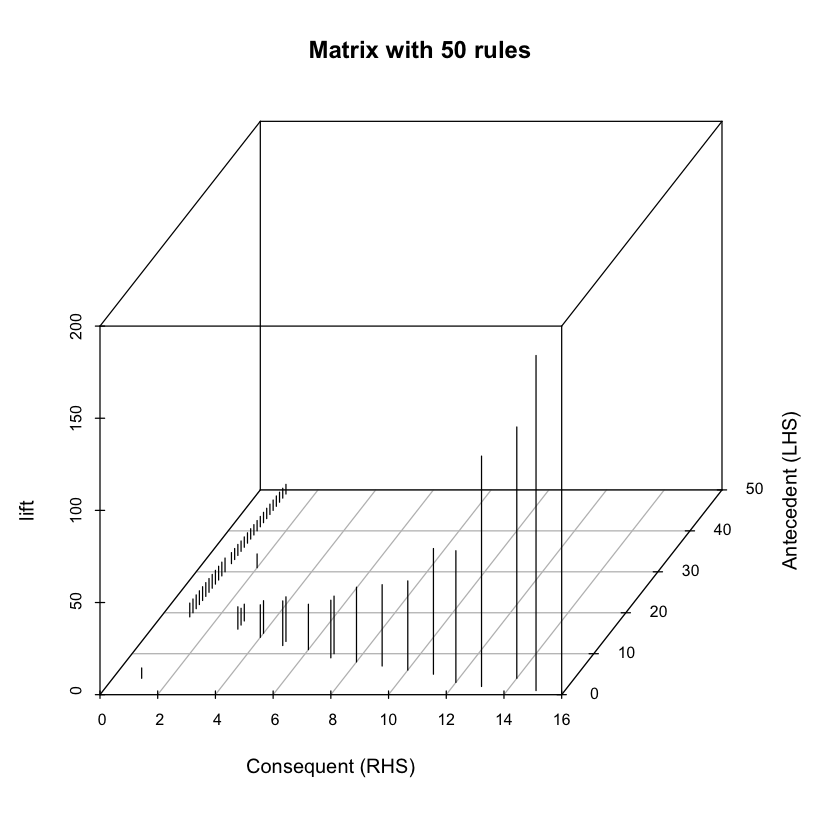

In [52]:
plot(tenarbasket, 
     method = "matrix3D", 
     measure = "lift")

We have the possibility to create a grouped matrix, also for 50 rules:

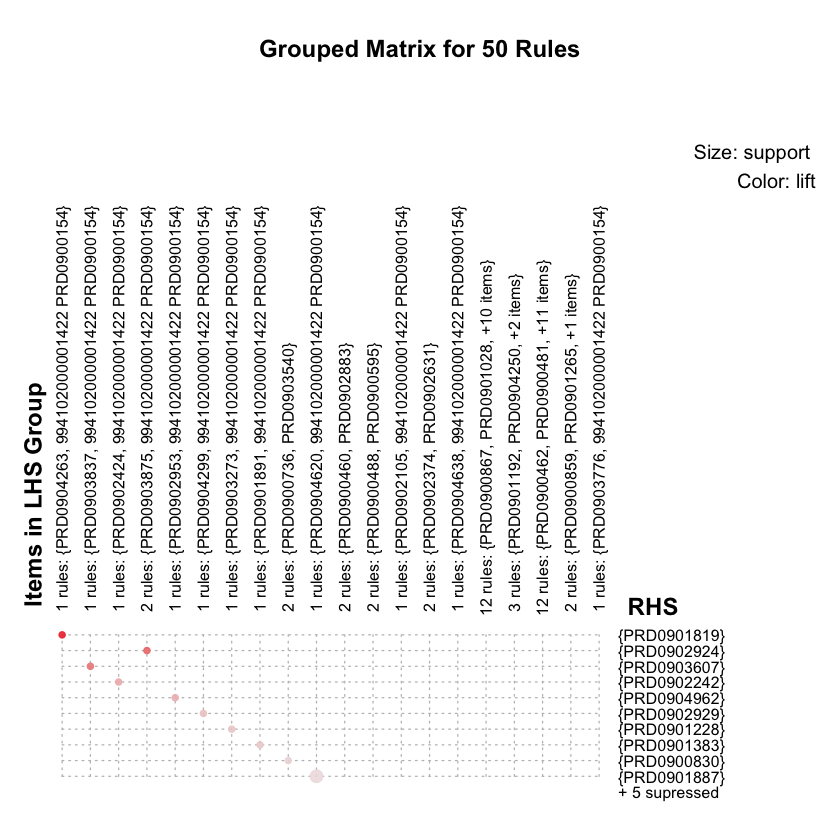

In [53]:
plot(tenarbasket, 
     method = "grouped", 
     measure="support")

Additionally, we can show dependencies with parallel coordinates plot, in this case just for the 10 rules with the highest confidence. The most red arrow represents the rule with the highest lift, as we saw before, between the product PRD0904263 and PRD0901819. Also we can see that a lot of arrow connect the product PRD0903052 on the second position.

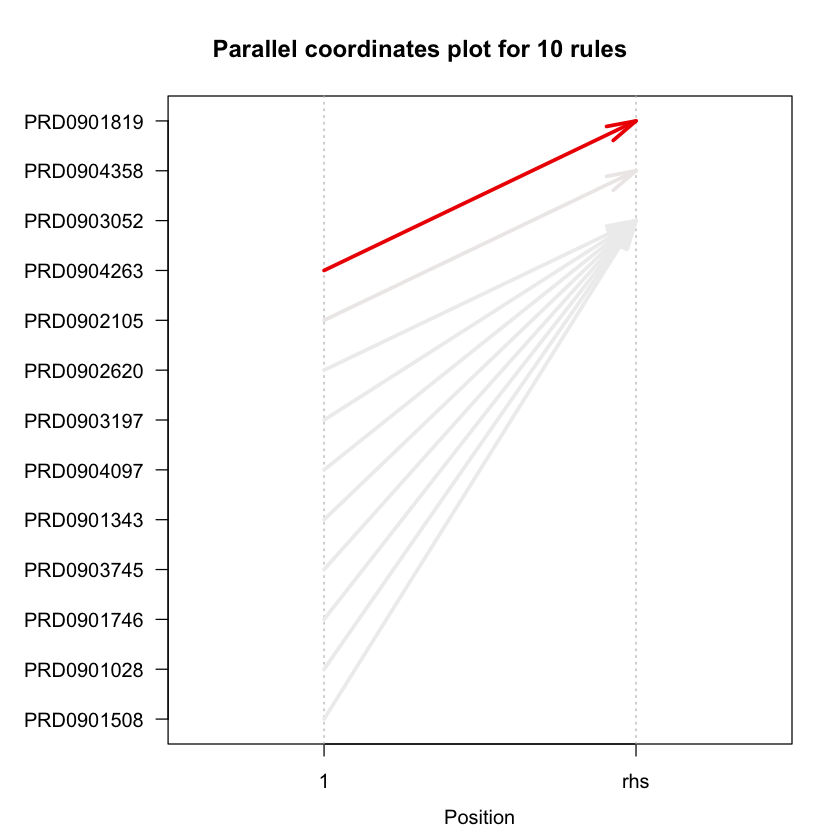

In [42]:
tensarbasket <- head(arbasket, 
                     n = 10, 
                     by = "confidence")
plot(tensarbasket, 
     method = "paracoord",
    control = list(reorder = TRUE))

Instead of creating the above representation we can display it as the scheme below, obtaining the same results:

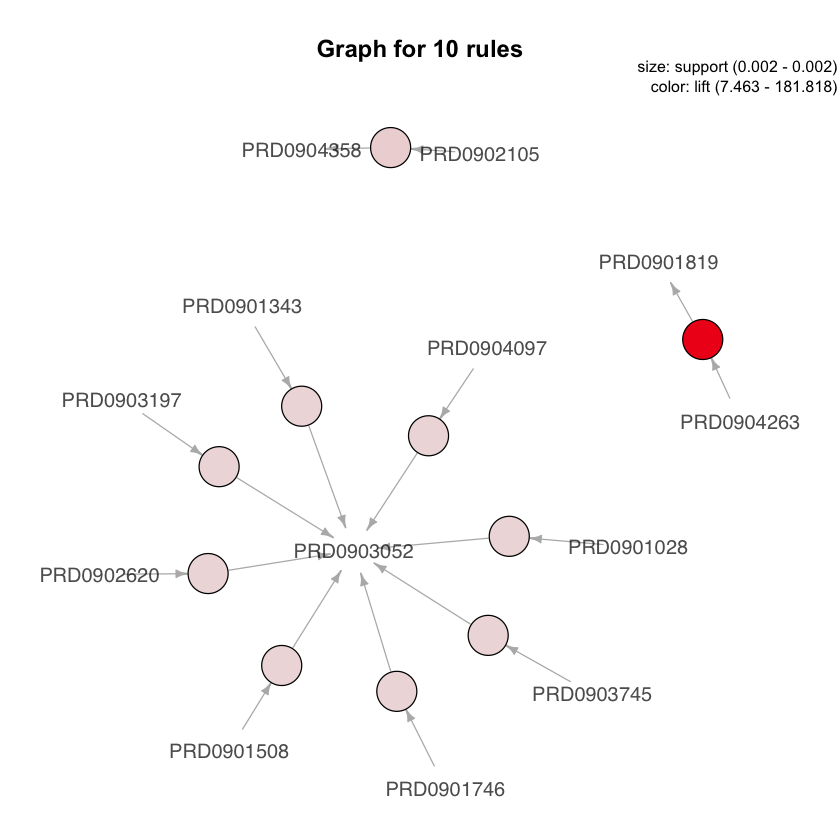

In [43]:
plot(tensarbasket, 
     method = "graph",
     control=list(alpha=1))

Until now, we were choosing the result based on the parameters lift, support and confidence, but it will be possible also to check only the rules that implied one product, this could be helpful if we want just to have the information for one concrete product

In this case we will analyze the product: PRD0900302

In [44]:
PRD0903052.rule <- sort(subset(arbasket, subset = rhs %in% "PRD0903052"), by = "confidence")
summary(PRD0903052.rule)

set of 175 rules

rule length distribution (lhs + rhs):sizes
  2   3 
161  14 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    2.00    2.08    2.00    3.00 

summary of quality measures:
    support          confidence         lift          count      
 Min.   :0.00150   Min.   :0.400   Min.   :2.99   Min.   : 3.00  
 1st Qu.:0.00150   1st Qu.:0.444   1st Qu.:3.32   1st Qu.: 3.00  
 Median :0.00200   Median :0.500   Median :3.73   Median : 4.00  
 Mean   :0.00217   Mean   :0.574   Mean   :4.28   Mean   : 4.34  
 3rd Qu.:0.00250   3rd Qu.:0.667   3rd Qu.:4.98   3rd Qu.: 5.00  
 Max.   :0.00800   Max.   :1.000   Max.   :7.46   Max.   :16.00  

mining info:
   data ntransactions support confidence
 basket          2000  0.0015        0.4

As we can see above, the product PRD0903052 appears in 175 rules

We are sure that there is not any redundant rule, as all of them were removed before to the data set arbasket

In [45]:
inspect(PRD0903052.rule[1:20])

     lhs                        rhs          support confidence lift   count
[1]  {PRD0901508}            => {PRD0903052} 0.0015  1.00       7.4627 3    
[2]  {PRD0901028}            => {PRD0903052} 0.0015  1.00       7.4627 3    
[3]  {PRD0901746}            => {PRD0903052} 0.0015  1.00       7.4627 3    
[4]  {PRD0903745}            => {PRD0903052} 0.0015  1.00       7.4627 3    
[5]  {PRD0901343}            => {PRD0903052} 0.0015  1.00       7.4627 3    
[6]  {PRD0904097}            => {PRD0903052} 0.0015  1.00       7.4627 3    
[7]  {PRD0903197}            => {PRD0903052} 0.0015  1.00       7.4627 3    
[8]  {PRD0902620}            => {PRD0903052} 0.0015  1.00       7.4627 3    
[9]  {PRD0901086}            => {PRD0903052} 0.0015  1.00       7.4627 3    
[10] {PRD0900867}            => {PRD0903052} 0.0025  1.00       7.4627 5    
[11] {PRD0901244}            => {PRD0903052} 0.0020  1.00       7.4627 4    
[12] {PRD0901895}            => {PRD0903052} 0.0025  1.00       7.4627 5    

We can represent the 175 rules obtained for the product: PRD0903052

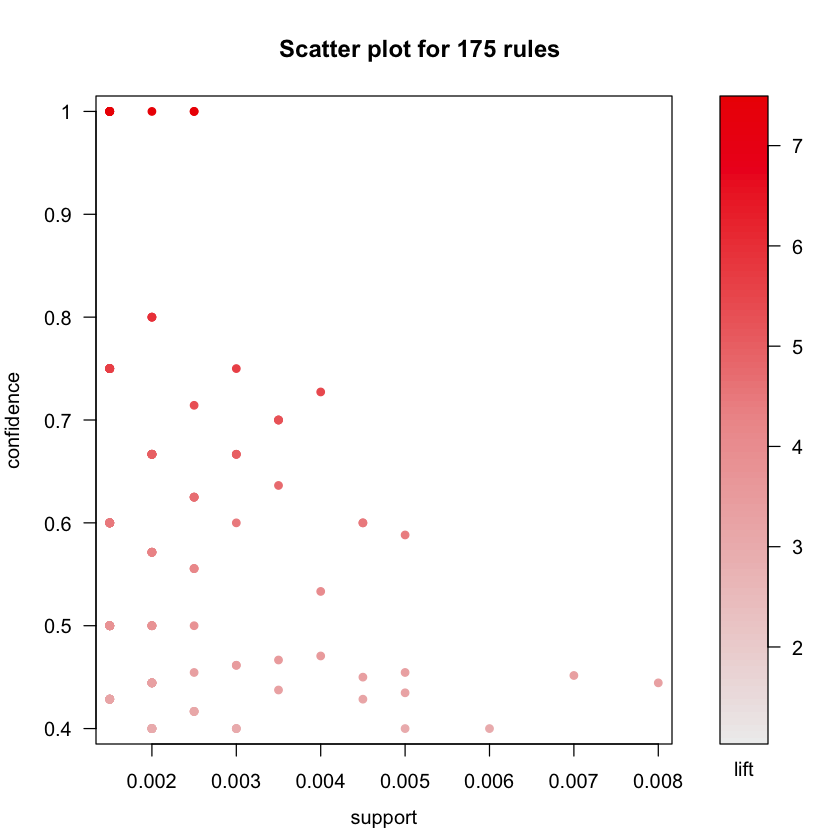

In [46]:
plot(PRD0903052.rule,  
     measure=c("support", "confidence"), 
     shading="lift", 
     jitter = 0)

As we can see, when there is lower support there is larger confidence, and larger lift

3) Conclusions:

In comparison with others unsupervised machine learning methods, in association rules the fist step of data preparation is really important, and it can be really time consuming. Most of the times we have a continuous data, and in order to apply the algorithm, firstly the data should be converted to discrete.

In large datasets it is really difficult to make an interpretation from the tables or matrix, as we have several times millions of values. For this reason, the graphical analysis for the interpretation of the results is really important in this case.

4) Data set bibliography:

https://www.dunnhumby.com/careers/engineering/sourcefiles?sourcefile=https%3A//www.dunnhumby.com/sites/default/files/sourcefiles/dunnhumby_Let%27s-Get-Sort-of-Real-%28Sample-2K-baskets%29.zip